In [5]:
from pyforest import*
lazy_imports()

['from pyspark import SparkContext',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.ensemble import RandomForestClassifier',
 'from PIL import Image',
 'import gensim',
 'import statsmodels.api as sm',
 'from sklearn.model_selection import KFold',
 'from sklearn.linear_model import Ridge',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.linear_model import LogisticRegression',
 'import fbprophet',
 'import xgboost as xgb',
 'from sklearn import svm',
 'import pickle',
 'import awswrangler as wr',
 'import imutils',
 'import numpy as np',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import glob',
 'from sklearn.preprocessing import OneHotEncoder',
 'import cv2',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import pydot',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.decomposition import PCA',
 'from sklearn.linear_model import Li

In [4]:
data = pd.read_csv('Bank_data_Modelling.csv')
data.head()

<IPython.core.display.Javascript object>

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## <span style="color:blue"> **Details sur les variables** </span>  
#### <span style="color:blue"> **ID :** </span> Identifiant du client  
#### <span style="color:blue"> **Age :** </span> Age du client  
#### <span style="color:blue"> **Experience :** </span> Nombre d'année d'expériences professionnelle du client    
#### <span style="color:blue"> **Income :** </span> Revenu annuel du client en dollar. ($000)

#### <span style="color:blue"> **ZIP Code :** </span> Adresse    
#### <span style="color:blue"> **Family :** </span> Taille du menage du client  
#### <span style="color:blue"> **CCAvg :** </span> depense mensuelle moyen ($000)   

#### <span style="color:blue"> **Education :** </span> Niveau d'alphabétisation 1:Undergrad(1er cycle Université); 2:Graduate(diplôme); 3: Advanced/Professional(Professionel)  
#### <span style="color:blue"> **Mortgage :** </span> Valeur de l'hypothèque immobilière, le cas échéant. ($000)  
#### <span style="color:blue"> **Personal Loan :** </span> Le client a-t-il accepté le prêt personnel proposé lors de la dernière campagne ?  
#### <span style="color:blue"> **Securities Account :** </span> Le client possède-t-il un compte-titres auprès de la banque ?  
#### <span style="color:blue"> **CD Account :** </span> Le client possède-t-il un compte de certificat de dépôt (CD) auprès de la banque ?  
#### <span style="color:blue"> **Online :** </span> Le client utilise-t-il les services bancaires en ligne?  

In [7]:
# Les details sur les dimensions de la base
data.shape

(5000, 14)

In [8]:
data.dtypes # Affichons les types de données

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [13]:
# voyons s'il y'a des valeurs null
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### On voit clairement qu'il n'ya pas de valeurs manquante

In [12]:
# affichons les statistiques 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


on voit que l'expérience moyenne est des clients est de 20 ans. Le revenu moyen est de 73774,2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

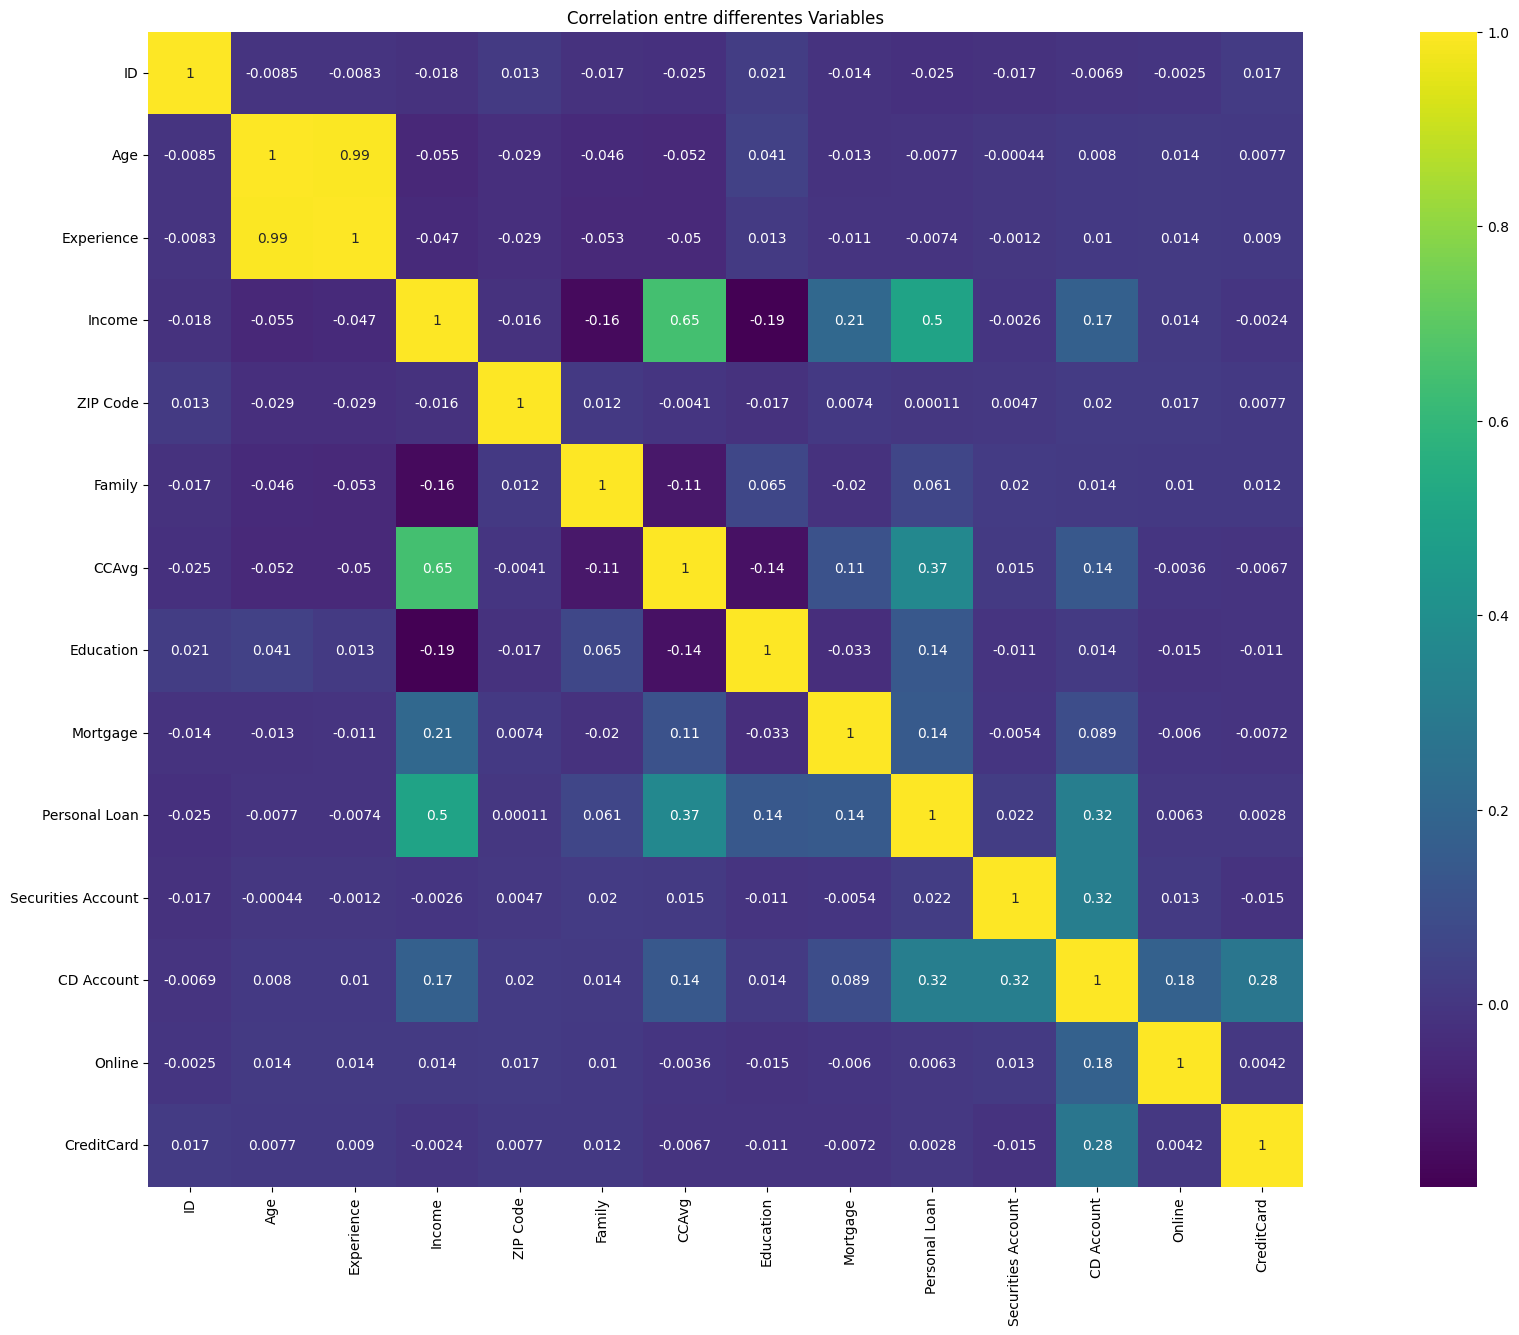

In [26]:
# analyse des correlations
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(), vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation entre differentes Variables')
plt.show()

X= data.iloc[:,]